In [100]:
import numpy as np
import matplotlib.pyplot as plt
from neural_net import TwoLayerNet
import cPickle, gzip

# Load the dataset
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
X_train = array(train_set[0])
y_train = array(train_set[1])
X_val = array(valid_set[0])
y_val = array(valid_set[1])
X_test = array(test_set[0])
y_test = array(test_set[1])
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Train data shape:  (50000, 784)
Train labels shape:  (50000,)
Validation data shape:  (10000, 784)
Validation labels shape:  (10000,)
Test data shape:  (10000, 784)
Test labels shape:  (10000,)


In [102]:
input_size = 28 * 28
hidden_size = 100
num_classes = 10
# initialize the network
net = TwoLayerNet(input_size, hidden_size, num_classes)

# train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=5000, batch_size=200,
            learning_rate=1.0,learning_rate_decay=0.95,
            reg=1e-5, verbose=True)

# predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print 'Validation accuracy: ', val_acc

iteration 0 / 5000: loss 2.302585
iteration 100 / 5000: loss 0.341891
iteration 200 / 5000: loss 0.300191
iteration 300 / 5000: loss 0.159381
iteration 400 / 5000: loss 0.213381
iteration 500 / 5000: loss 0.088365
iteration 600 / 5000: loss 0.164656
iteration 700 / 5000: loss 0.139500
iteration 800 / 5000: loss 0.187264
iteration 900 / 5000: loss 0.134597
iteration 1000 / 5000: loss 0.071716
iteration 1100 / 5000: loss 0.091417
iteration 1200 / 5000: loss 0.165058
iteration 1300 / 5000: loss 0.044370
iteration 1400 / 5000: loss 0.100215
iteration 1500 / 5000: loss 0.034800
iteration 1600 / 5000: loss 0.049770
iteration 1700 / 5000: loss 0.028386
iteration 1800 / 5000: loss 0.029168
iteration 1900 / 5000: loss 0.045715
iteration 2000 / 5000: loss 0.072227
iteration 2100 / 5000: loss 0.120951
iteration 2200 / 5000: loss 0.074576
iteration 2300 / 5000: loss 0.057674
iteration 2400 / 5000: loss 0.037074
iteration 2500 / 5000: loss 0.034004
iteration 2600 / 5000: loss 0.079821
iteration 270

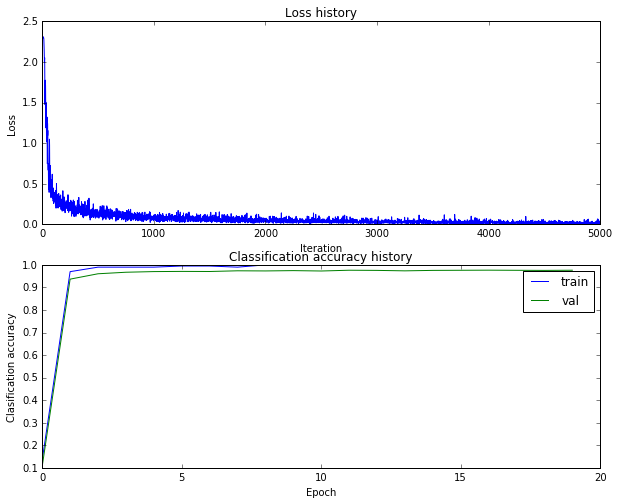

In [99]:
# Plot the loss function and train / validation accuracies
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.legend()
plt.ylabel('Clasification accuracy')

plt.show()
fig.savefig('loss_class_acc.png')

In [93]:
test_acc = (net.predict(X_test) == y_test).mean()
print 'Test accuracy: ', test_acc


Test accuracy:  0.9768


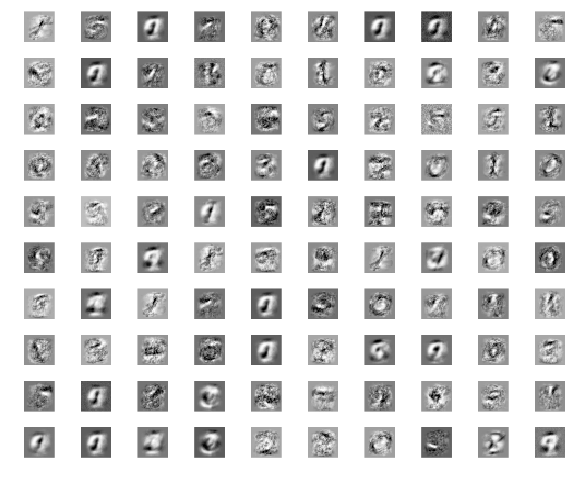

In [94]:
count = 1
for i in range(100):
    W1 = net.params['W1']
    imarray = np.asfarray(W1[:,i]).reshape((28,28))
    subplot(10,10, count)
    subplots_adjust(hspace=0.5)
    count += 1
    plt.imshow(imarray, cmap='Greys', interpolation='None')
    plt.gca().axis('off')